In [ ]:
# Classification problem, dùng machine learning để phân loại là 1 trong những lĩnh vực được ứng dụng phổ biến nhất của machine learning và deep learning. 
# Có nhiều loại classification là binary classification, multi-class classification và multi-label classification.
# binary classification: chỉ có 2 class, ví dụ như phân loại ảnh là chó hay mèo.
# multi-class classification: có nhiều hơn 2 class, ví dụ như phân loại ảnh là chó, mèo, gấu, hổ.
# multi-label classification: có nhiều hơn 2 class, nhưng mỗi sample có thể thuộc nhiều class, ví dụ như phân loại ảnh là chó, mèo, gấu, hổ, nhưng ảnh có thể có chó và mèo cùng lúc.

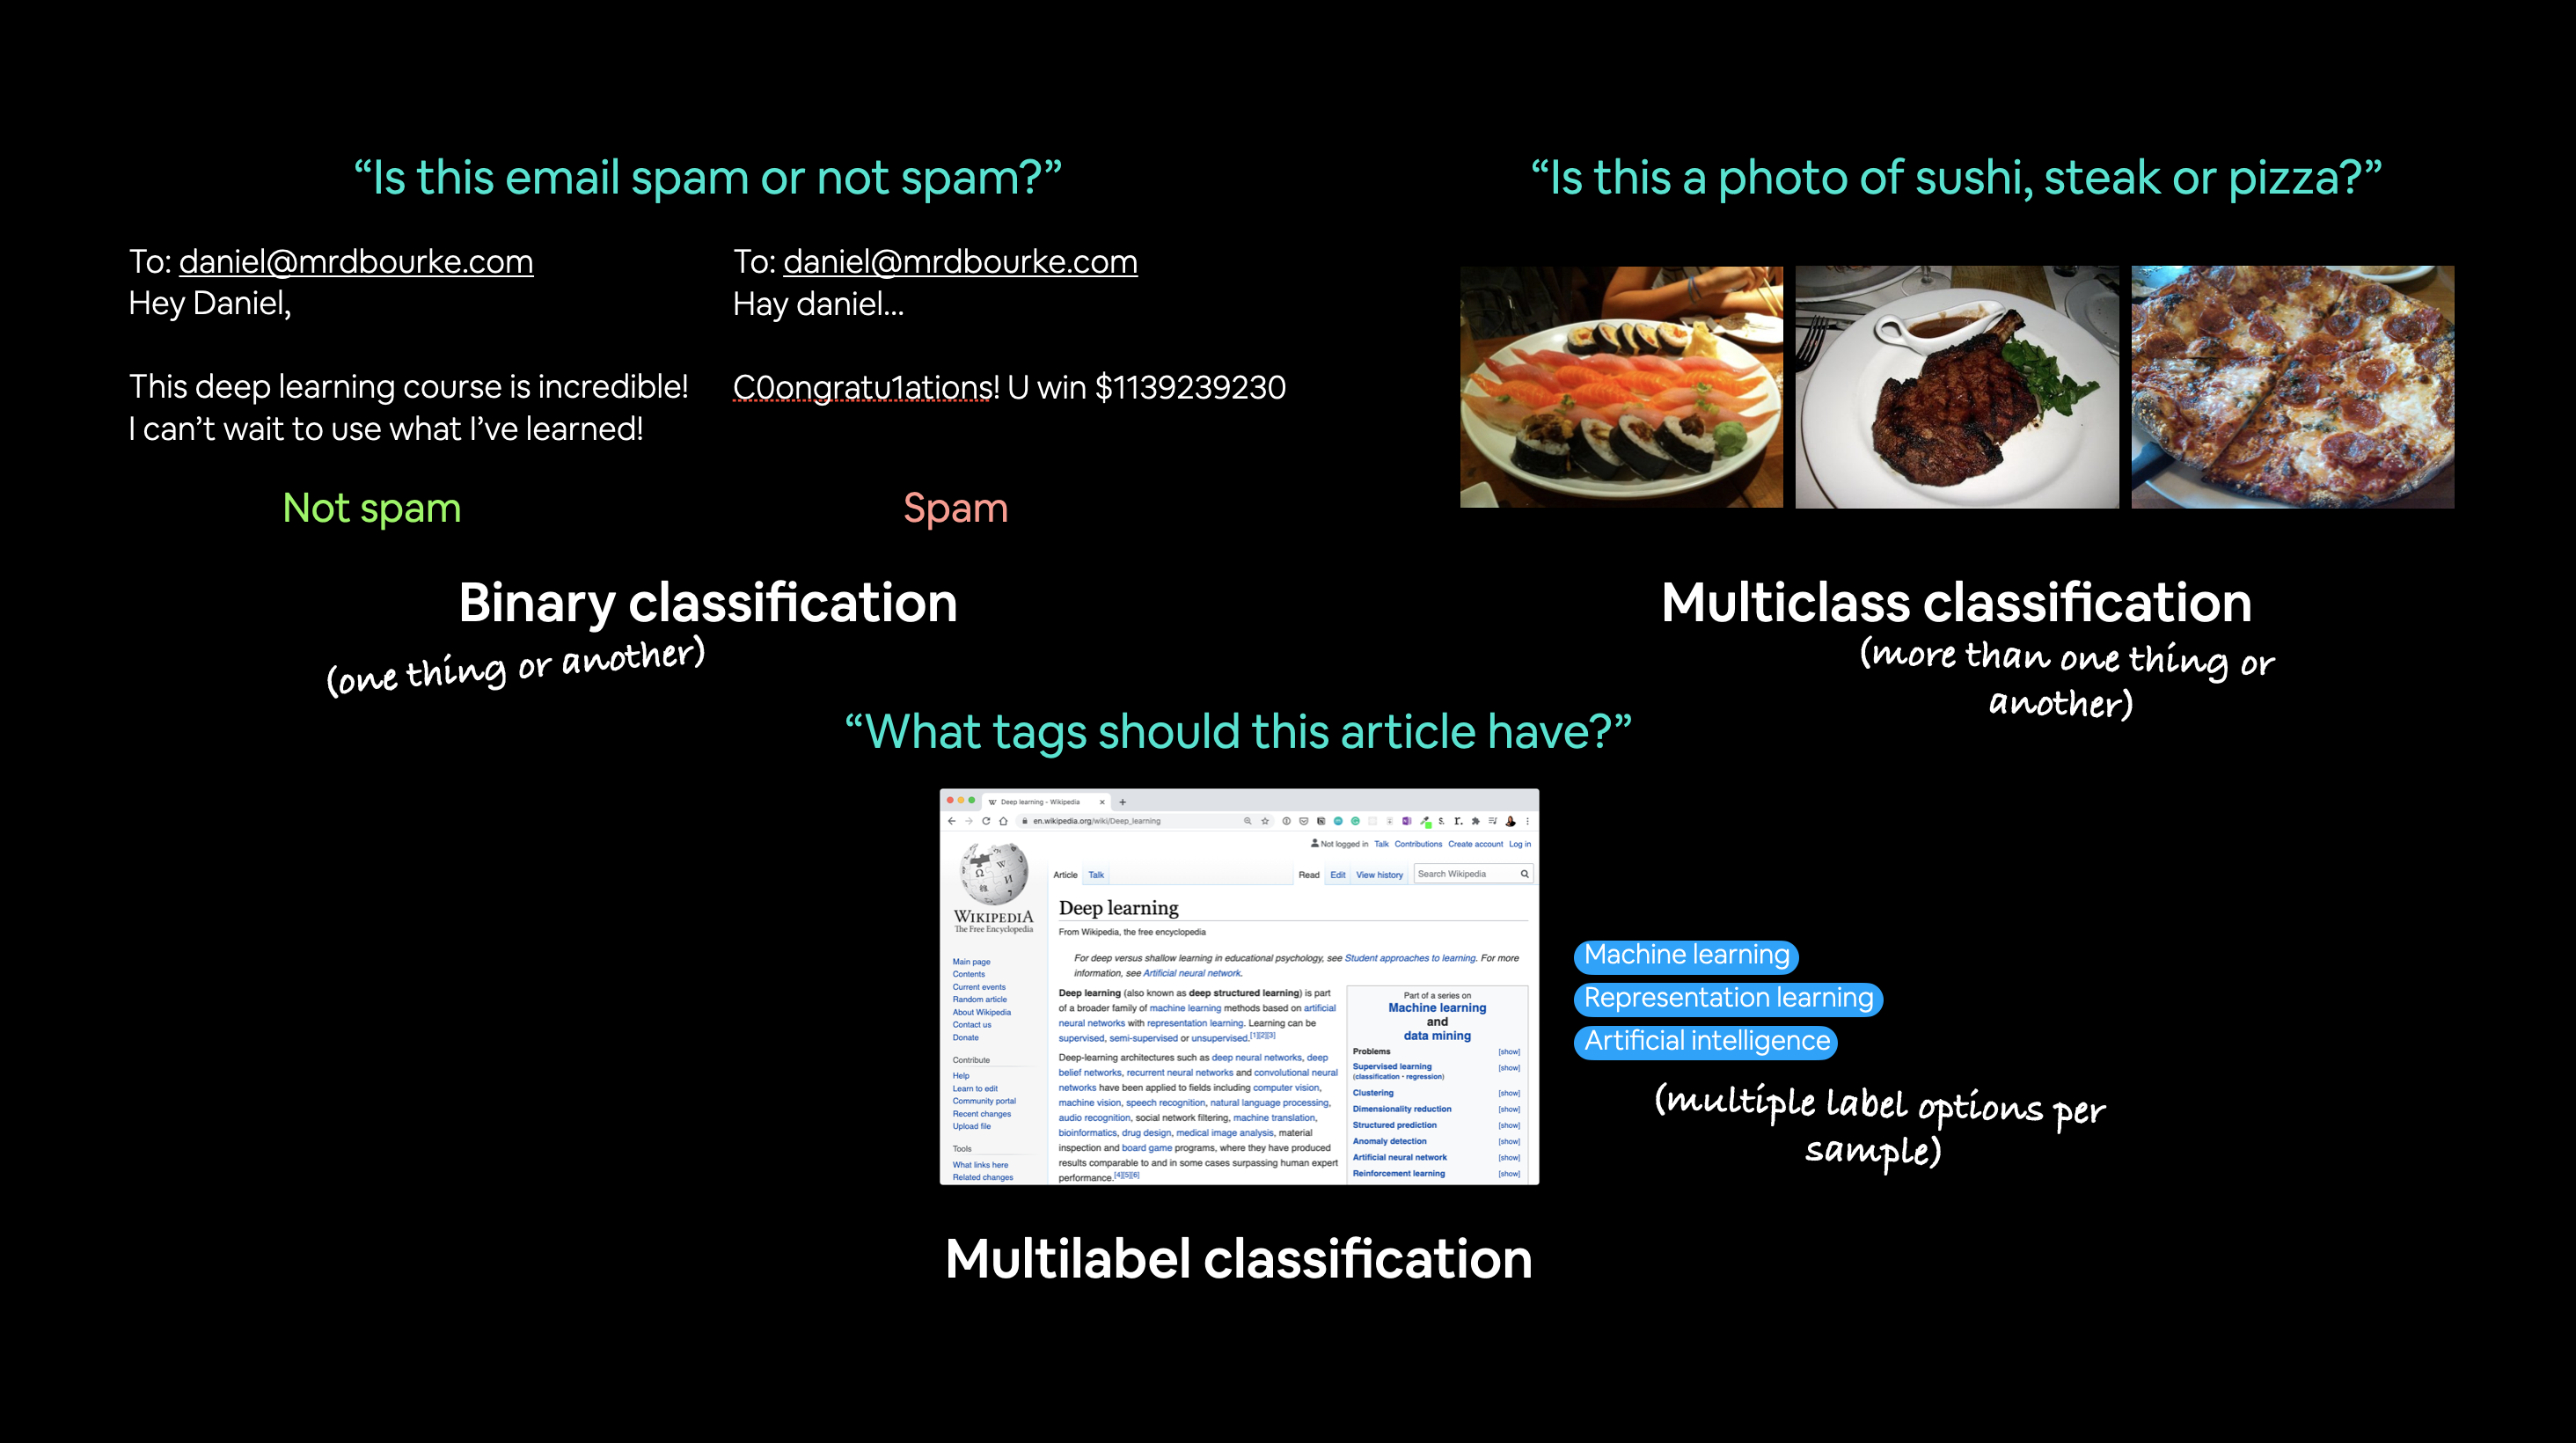


# 0. Kiến trúc của classification neural network

In [ ]:
# Nhắc lại 1 số khái niệm hyperparameter trong binary và multi-class classification:
# Input layer shape (in_features): số lượng feature của 1 sample. (Ví dụ: 5 features: tuổi, giới tính, chiều cao, cân nặng, nhịp tim)
# Hidden layer(s): số lượng hidden layer nhỏ nhất là 1, nhiều nhất là vô hạn. Mỗi hidden layer có số lượng neuron khác nhau.
# Neurons per hidden layer (out_features): số lượng neuron trong 1 hidden layer. (Ví dụ: 10 neurons) thường là 10 và 512
# Output layer shape (out_features): số lượng class. (Ví dụ: 2 class: chó, mèo) cho binary classification, nhiều hơn 2 class cho multi-class classification.
# Hidden layer activation: hàm kích hoạt của hidden layer. (Ví dụ: ReLU, Tanh, Sigmoid) thường là ReLU và Tanh (ReLU cho hidden layer, Sigmoid cho output layer) 
# Output layer activation: hàm kích hoạt của output layer. (Ví dụ: Sigmoid, Softmax) thường là Sigmoid cho binary classification, Softmax cho multi-class classification.
# Loss function: hàm loss function. (Ví dụ: BinaryCrossEntropy, CategoricalCrossEntropy) thường là BinaryCrossEntropy cho binary classification, CategoricalCrossEntropy cho multi-class classification.
# Optimizer: thuật toán tối ưu hóa. (Ví dụ: SGD, Adam) thường là Adam.

# 1. Tạo dữ liệu phân loại và chuẩn bị 

In [1]:
from sklearn.datasets import make_circles # make_circles: tạo ra 1 dataset với 2 class và 2 features, 2 class này có dạng hình tròn có màu khác nhau.

# Tạo ra 1000 samples với 2 features và 2 class, noise=0.03 là độ nhiễu của 2 class.
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42) # random_state=42: để cho kết quả giống nhau khi chạy lại code.

print(f"First 5 X features:\n{X[:5]}") # 5 samples đầu tiên của X.
print(f"\nFirst 5 y labels:\n{y[:5]}") # 5 samples đầu tiên của y.

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [2]:
# Cho X và y vào DataFrame để dễ nhìn hơn.
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

# Dễ thấy với mỗi cặp X1 và X2 thì có 1 label tương ứng (0 hoặc 1).

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
# Kiểm tra số lượng label 0 và 1.
circles["label"].value_counts() # Truy vấn cột trong DataFrame: circles["label"] hoặc circles.label

# Số lượng label 0 và 1 gần bằng nhau, nên dataset này là balanced dataset.

label
1    500
0    500
Name: count, dtype: int64

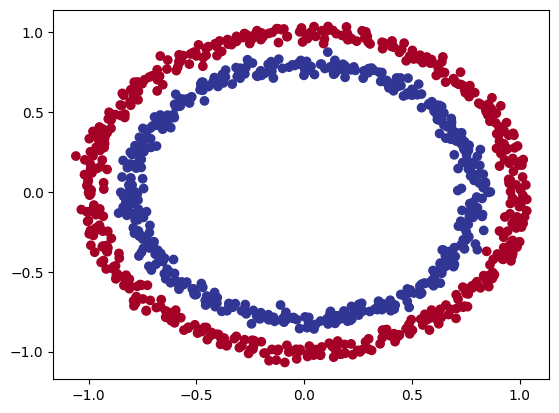

In [5]:
# Trực quan hóa dataset.
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

# Việc cần làm là dự đoán label của 1 sample mới, dựa vào 2 features của sample đó. 

In [8]:
# 1.1 Shape của input và output layer.
# 1 trong những điều quan trọng nhất khi xây dựng neural network là shape của input và output layer. Đó cũng chính là 1 trong những lỗi thường gặp nhất khi xây dựng neural network. 
# Để xác định shape của input và output layer, ta cần xác định shape của X và y.
display(X.shape, y.shape)

# X có shape là (1000, 2) và y có shape là (1000,). 
# Với X có shape là (1000, 2) thì có thể hiểu là X có 1000 samples và 2 features. 
# Với y có shape là (1000,) thì có thể hiểu là y có 1000 samples và 1 label tương ứng với mỗi sample.
# Vậy shape của input layer là (2,) và output layer là (1,).

X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

(1000, 2)

(1000,)

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [9]:
# 1.2 Chuyển đổi data về tensor. Tạo train và test set từ data. 

# Chuyển đổi data về tensor.
# Nếu không dùng tensor thì sẽ ảnh hưởng đến việc tính toán sau này.
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Xem 5 samples đầu tiên của X và y.
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
# Cùng chia data thành train và test set.
from sklearn.model_selection import train_test_split # train_test_split: chia data thành train và test set.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% data cho test set.
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 2. Dựng model

In [11]:
# Các bước để xây dựng 1 neural network cho classification problem:
# 1. Cài đặt device để có thể sử dụng GPU (nếu có) để tăng tốc độ tính toán.
# 2. Tạo model bằng cách kế thừa class torch.nn.Module.
# 3. Thiết lập các layer của model trong hàm __init__() như loss function, optimizer, activation function.
# 4. Tạo train loop để train model.

# import các thư viện cần thiết.
import torch
from torch import nn

# Gán device là cuda nếu có GPU, nếu không thì là cpu. 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
# 1. Tạo model bằng cách kế thừa class torch.nn.Module.
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Tạo 2 nn.Linear layers có khả năng xử lý X và y.
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # Lấy 2 features của X, tạo ra 5 features mới.
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # Lấy 5 features của layer_1, tạo ra 1 feature mới.
    
    # 3. Định nghĩa forward function để tính toán output của model.
    def forward(self, x):
        # Trả về output của layer_2, là 1 feature mới có shape là (1,) (vì output layer có shape là (1,)).
        return self.layer_2(self.layer_1(x)) # self.layer_1(x): tính toán output của layer_1, sau đó đưa vào layer_2 để tính toán output của layer_2.

# 4. Tạo ra 1 instance của model và gán vào device.
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)